In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pingouin as pg

sales_data = {
    'Order_ID': [101, 102, 103, 104, 105],
    'Product': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Tablet'],
    'Category': ['Electronics', 'Accessories', 'Accessories', 'Electronics', 'Electronics'],
    'Quantity': [1, 2, 1, 3, 1],
    'Order_Date': ['2023-01-15', '2023-02-20', '2023-03-10', '2023-04-18', '2023-05-05'],
    'Price': [1000, 25, 45, 200, 500]
}

customer_data = {
    'Customer_ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Country': ['US', 'Canada', 'US', 'UK', None],
    'Age': [25, 34, None, 29, 22],
    'Loyalty_Score': [4.5, None, 3.8, 4.0, 4.7],
}

shipment_data = {
    'Order_ID': [101, 102, 106, 107, 108],
    'Shipment_Date': ['2023-01-17', '2023-02-22', '2023-06-15', '2023-07-20', '2023-08-25'],
    'Shipping_Cost': [15.5, 12.0, 18.0, 22.5, 10.0],
    'Carrier': ['FedEx', 'UPS', 'DHL', 'FedEx', 'UPS']
}


In [5]:
df_sales = pd.DataFrame(sales_data)
display(df_sales.head(3))

,Order_ID,Product,Category,Quantity,Order_Date,Price
0,101,Laptop,Electronics,1,2023-01-15,1000
1,102,Mouse,Accessories,2,2023-02-20,25
2,103,Keyboard,Accessories,1,2023-03-10,45


In [7]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Order_ID    5 non-null      int64 
 1   Product     5 non-null      object
 2   Category    5 non-null      object
 3   Quantity    5 non-null      int64 
 4   Order_Date  5 non-null      object
 5   Price       5 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 372.0+ bytes


In [9]:
df_sales.describe()

,Order_ID,Quantity,Price
count,5.000000,5.000000,5.000000
mean,103.000000,1.600000,354.000000
std,1.581139,0.894427,408.065558
min,101.000000,1.000000,25.000000
25%,102.000000,1.000000,45.000000
50%,103.000000,1.000000,200.000000
75%,104.000000,2.000000,500.000000
max,105.000000,3.000000,1000.000000


In [15]:
df_sales['Order_Date'] = pd.to_datetime(df_sales['Order_Date'])
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order_ID    5 non-null      int64         
 1   Product     5 non-null      object        
 2   Category    5 non-null      object        
 3   Quantity    5 non-null      int64         
 4   Order_Date  5 non-null      datetime64[ns]
 5   Price       5 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 372.0+ bytes


In [19]:
df_sales.rename(columns={'Price': 'Unit_price'}, inplace=True)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order_ID    5 non-null      int64         
 1   Product     5 non-null      object        
 2   Category    5 non-null      object        
 3   Quantity    5 non-null      int64         
 4   Order_Date  5 non-null      datetime64[ns]
 5   Unit_price  5 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 372.0+ bytes


In [21]:
df_sales_transpose = df_sales.transpose()
df_sales_transpose

,0,1,2,3,4
Order_ID,101,102,103,104,105
Product,Laptop,Mouse,Keyboard,Monitor,Tablet
Category,Electronics,Accessories,Accessories,Electronics,Electronics
Quantity,1,2,1,3,1
Order_Date,2023-01-15 00:00:00,2023-02-20 00:00:00,2023-03-10 00:00:00,2023-04-18 00:00:00,2023-05-05 00:00:00
Unit_price,1000,25,45,200,500


In [29]:
df_sales['Category'].nunique()

2

In [35]:
df_sales['Product'].value_counts()

Product
Laptop      1
Mouse       1
Keyboard    1
Monitor     1
Tablet      1
Name: count, dtype: int64

In [37]:
df_sales.groupby(['Category'])['Quantity'].sum()

Category
Accessories    3
Electronics    5
Name: Quantity, dtype: int64

In [43]:
df_sales.pivot_table(values = 'Unit_price',
                    index = 'Category',
                    columns='Product',
                    aggfunc='mean')

Product,Keyboard,Laptop,Monitor,Mouse,Tablet
Category,,,,,
Accessories,45.0,NaN,NaN,25.0,NaN
Electronics,NaN,1000.0,200.0,NaN,500.0


In [45]:
df_sales[df_sales['Quantity']>1]

,Order_ID,Product,Category,Quantity,Order_Date,Unit_price
1,102,Mouse,Accessories,2,2023-02-20,25
3,104,Monitor,Electronics,3,2023-04-18,200


<Axes: xlabel='Category'>

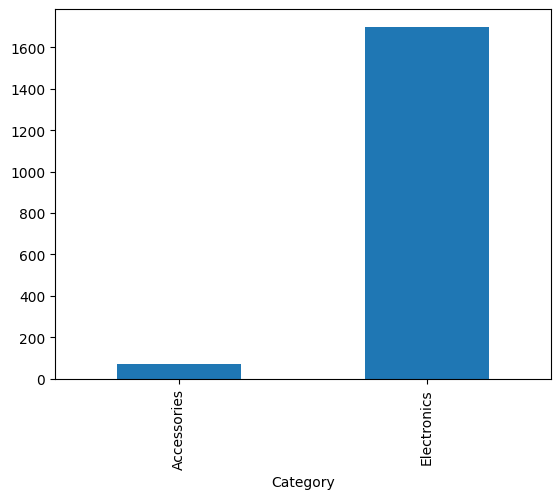

In [51]:
df_sales.groupby('Category')['Unit_price'].sum().plot(kind = 'bar')

<Axes: xlabel='Order_Date'>

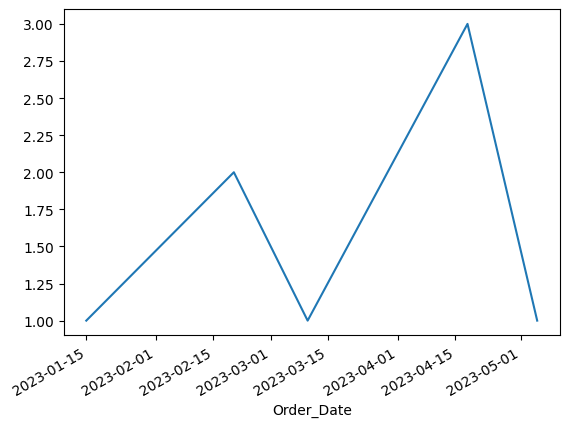

In [55]:
df_sales.set_index('Order_Date')['Quantity'].plot(kind = 'line')

<Axes: xlabel='Unit_price', ylabel='Quantity'>

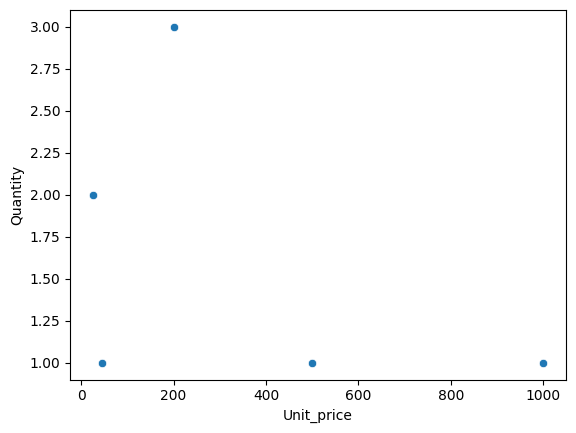

In [61]:
sns.scatterplot(df_sales,x='Unit_price',y='Quantity')

In [71]:
pd.get_dummies(df_sales, columns=['Category'])

,Order_ID,Product,Quantity,Order_Date,Unit_price,Category_Accessories,Category_Electronics
0,101,Laptop,1,2023-01-15,1000,False,True
1,102,Mouse,2,2023-02-20,25,True,False
2,103,Keyboard,1,2023-03-10,45,True,False
3,104,Monitor,3,2023-04-18,200,False,True
4,105,Tablet,1,2023-05-05,500,False,True


In [83]:
df_shipment = pd.DataFrame(shipment_data)
pd.merge(left = df_sales, right = df_shipment, how = 'left', on = 'Order_ID', validate= '1:1')

,Order_ID,Product,Category,Quantity,Order_Date,Unit_price,Shipment_Date,Shipping_Cost,Carrier
0,101,Laptop,Electronics,1,2023-01-15,1000,2023-01-17,15.5,FedEx
1,102,Mouse,Accessories,2,2023-02-20,25,2023-02-22,12.0,UPS
2,103,Keyboard,Accessories,1,2023-03-10,45,NaN,NaN,NaN
3,104,Monitor,Electronics,3,2023-04-18,200,NaN,NaN,NaN
4,105,Tablet,Electronics,1,2023-05-05,500,NaN,NaN,NaN


In [87]:
df_customer = pd.DataFrame(customer_data)
pd.concat([df_sales, df_customer])

,Order_ID,Product,Category,Quantity,Order_Date,Unit_price,Customer_ID,Name,Country,Age,Loyalty_Score
0,101.0,Laptop,Electronics,1.0,2023-01-15,1000.0,NaN,NaN,NaN,NaN,NaN
1,102.0,Mouse,Accessories,2.0,2023-02-20,25.0,NaN,NaN,NaN,NaN,NaN
2,103.0,Keyboard,Accessories,1.0,2023-03-10,45.0,NaN,NaN,NaN,NaN,NaN
3,104.0,Monitor,Electronics,3.0,2023-04-18,200.0,NaN,NaN,NaN,NaN,NaN
4,105.0,Tablet,Electronics,1.0,2023-05-05,500.0,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaT,NaN,1.0,Alice,US,25.0,4.5
1,NaN,NaN,NaN,NaN,NaT,NaN,2.0,Bob,Canada,34.0,NaN
2,NaN,NaN,NaN,NaN,NaT,NaN,3.0,Charlie,US,NaN,3.8
3,NaN,NaN,NaN,NaN,NaT,NaN,4.0,David,UK,29.0,4.0
4,NaN,NaN,NaN,NaN,NaT,NaN,5.0,Eve,None,22.0,4.7


In [103]:
df_sales.query('Unit_price > 100 and Category == "Electronics"')

,Order_ID,Product,Category,Quantity,Order_Date,Unit_price
0,101,Laptop,Electronics,1,2023-01-15,1000
3,104,Monitor,Electronics,3,2023-04-18,200
4,105,Tablet,Electronics,1,2023-05-05,500


In [107]:
temp = df_customer.isna().sum()
temp[temp.ge(1)].index.to_list()

['Country', 'Age', 'Loyalty_Score']

In [113]:
df_customer['Age'].fillna(df_customer['Age'].mean(), inplace=True)
df_customer

C:\Users\mengn\AppData\Local\Temp\ipykernel_5620\3447310471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_customer['Age'].fillna(df_customer['Age'].mean(), inplace=True)


,Customer_ID,Name,Country,Age,Loyalty_Score
0,1,Alice,US,25.0,4.5
1,2,Bob,Canada,34.0,NaN
2,3,Charlie,US,27.5,3.8
3,4,David,UK,29.0,4.0
4,5,Eve,None,22.0,4.7


In [119]:
df_customer.dropna(subset='Country', inplace=True)
df_customer

,Customer_ID,Name,Country,Age,Loyalty_Score
0,1,Alice,US,25.0,4.5
1,2,Bob,Canada,34.0,NaN
2,3,Charlie,US,27.5,3.8
3,4,David,UK,29.0,4.0


In [121]:
df_sales.sort_values('Unit_price')

,Order_ID,Product,Category,Quantity,Order_Date,Unit_price
1,102,Mouse,Accessories,2,2023-02-20,25
2,103,Keyboard,Accessories,1,2023-03-10,45
3,104,Monitor,Electronics,3,2023-04-18,200
4,105,Tablet,Electronics,1,2023-05-05,500
0,101,Laptop,Electronics,1,2023-01-15,1000


In [124]:
df_sales


,Order_ID,Product,Category,Quantity,Order_Date,Unit_price
0,101,Laptop,Electronics,1,2023-01-15,1000
1,102,Mouse,Accessories,2,2023-02-20,25
2,103,Keyboard,Accessories,1,2023-03-10,45
3,104,Monitor,Electronics,3,2023-04-18,200
4,105,Tablet,Electronics,1,2023-05-05,500


In [128]:
df_sales.drop_duplicates(['Product'])
df_sales

,Order_ID,Product,Category,Quantity,Order_Date,Unit_price
0,101,Laptop,Electronics,1,2023-01-15,1000
1,102,Mouse,Accessories,2,2023-02-20,25
2,103,Keyboard,Accessories,1,2023-03-10,45
3,104,Monitor,Electronics,3,2023-04-18,200
4,105,Tablet,Electronics,1,2023-05-05,500


In [130]:
df_customer.sort_values('Loyalty_Score', ascending=False)

,Customer_ID,Name,Country,Age,Loyalty_Score
0,1,Alice,US,25.0,4.5
3,4,David,UK,29.0,4.0
2,3,Charlie,US,27.5,3.8
1,2,Bob,Canada,34.0,NaN


In [134]:
df_sales['Unit_price'].sum()

1770

In [136]:
df_customer['Age'].mean()

28.875

In [142]:
df_shipment['Shipping_Cost'].std()

4.942165517260627

In [146]:
df_sales['Total_Cost'] = df_sales['Unit_price']*df_sales['Quantity']

In [148]:
df_sales

,Order_ID,Product,Category,Quantity,Order_Date,Unit_price,Total_Cost
0,101,Laptop,Electronics,1,2023-01-15,1000,1000
1,102,Mouse,Accessories,2,2023-02-20,25,50
2,103,Keyboard,Accessories,1,2023-03-10,45,45
3,104,Monitor,Electronics,3,2023-04-18,200,600
4,105,Tablet,Electronics,1,2023-05-05,500,500


In [152]:
df_shipment.duplicated()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [158]:
df_shipment.drop_duplicates('Order_ID',inplace=True)
df_shipment

,Order_ID,Shipment_Date,Shipping_Cost,Carrier
0,101,2023-01-17,15.5,FedEx
1,102,2023-02-22,12.0,UPS
2,106,2023-06-15,18.0,DHL
3,107,2023-07-20,22.5,FedEx
4,108,2023-08-25,10.0,UPS


In [160]:
df_orders = df_sales[df_sales['Order_Date']>'2023-03-01']

In [162]:
df_orders

,Order_ID,Product,Category,Quantity,Order_Date,Unit_price,Total_Cost
2,103,Keyboard,Accessories,1,2023-03-10,45,45
3,104,Monitor,Electronics,3,2023-04-18,200,600
4,105,Tablet,Electronics,1,2023-05-05,500,500


<Axes: ylabel='Frequency'>

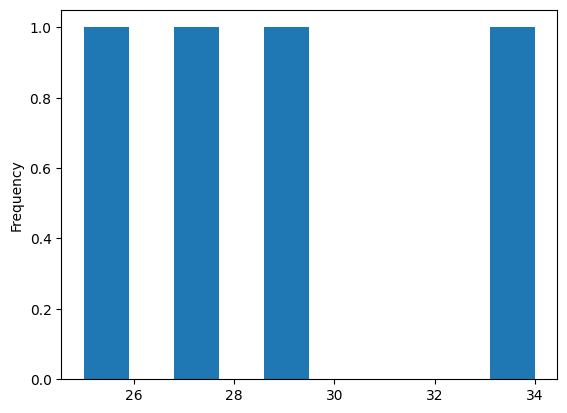

In [164]:
df_customer['Age'].plot(kind = 'hist')

<Axes: xlabel='Category', ylabel='Unit_price'>

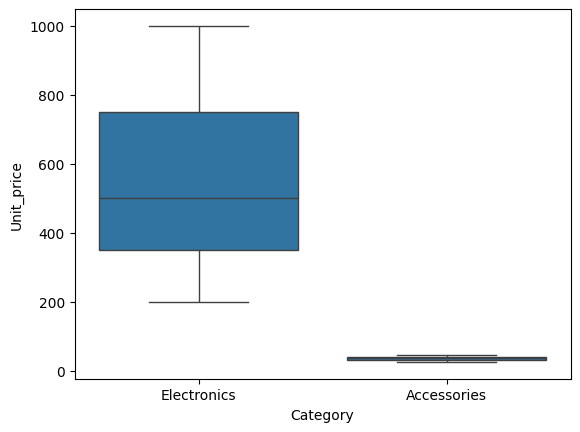

In [172]:
sns.boxplot(df_sales, y='Unit_price', x='Category')

In [180]:
df_sales.query('Order_Date.dt.month == 1 and Order_Date.dt.year == 2023')

,Order_ID,Product,Category,Quantity,Order_Date,Unit_price,Total_Cost
0,101,Laptop,Electronics,1,2023-01-15,1000,1000


In [182]:
df_shipment.groupby('Carrier')['Shipping_Cost'].sum()

Carrier
DHL      18.0
FedEx    38.0
UPS      22.0
Name: Shipping_Cost, dtype: float64

In [190]:
df_new = pd.merge(left = df_sales, right=df_shipment, how='inner', on = 'Order_ID', validate='1:1')

In [192]:
df_new.groupby('Category')['Shipping_Cost'].sum()

Category
Accessories    12.0
Electronics    15.5
Name: Shipping_Cost, dtype: float64

In [198]:
pg.linear_regression(df_sales['Unit_price'],df_sales['Quantity'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.938550,0.578965,3.348305,0.044114,0.190375,-0.079501,0.096026,3.781074
1,Unit_price,-0.000956,0.001139,-0.839891,0.462629,0.190375,-0.079501,-0.004580,0.002667


In [200]:
top_10_price = df_sales['Unit_price'].quantile(0.9)
df_sales.query('Order_Date >= "2023-01-01" and Order_Date <= "2023-04-01" and Unit_price >= @top_10_price')

,Order_ID,Product,Category,Quantity,Order_Date,Unit_price,Total_Cost
0,101,Laptop,Electronics,1,2023-01-15,1000,1000


In [202]:
df_schools = pd.read_excel('https://www.dropbox.com/scl/fi/27d9nvrhznhuzxk7iw1ue/schools_full_list.xlsx?rlkey=zekgxdwpqzdyl8n8u2r2fli8v&st=55ztfdsj&raw=1')

df_students = pd.read_excel('https://www.dropbox.com/scl/fi/jfvgl9pvd3hpikdmq9k16/students_full_list.xlsx?rlkey=d1t1rmakwb77t43rxndwdb594&st=2m8th8rd&raw=1')

df_students_interview = pd.read_excel('https://www.dropbox.com/scl/fi/xim7i3emz6us8srypej03/students_interview.xlsx?rlkey=i17iggzishi5ao0vkxttsregv&st=gz3oop16&raw=1')

In [204]:
df_schools

,grad_school,school_city,school_state
0,The George Washngton University,DC,DC
1,Georgetown University,DC,DC
2,Howard University,DC,DC
3,American University,DC,DC
4,Johns Hopkins University,Baltimore,MD
5,The Catholic University of America,DC,DC
6,Gallaudet University,DC,DC
7,University of the District of Columbia,DC,DC
8,Trinity Washington University,DC,DC
9,George Mason University,Fairfax,VA


In [210]:
#2
len(df_schools[df_schools['school_state']=='MD'])

5

In [212]:
bool(len(df_schools[df_schools['school_state']=='VA'])>len(df_schools[df_schools['school_state']=='MD']))

True

In [214]:
df_students

,student_name,no_of_interviews,sex,age
0,Ezra,2,M,23
1,Milo,1,M,56
2,Sally,4,F,21
3,James,35,M,22
4,Kylie,20,F,22
5,Emma,28,F,23
6,Owen,18,M,21
7,Roy,14,M,24
8,Jay,2,M,25
9,Nova,25,F,22


In [220]:
df_students['sex'].eq('M').mul(100).mean()

60.0

In [222]:
df_students_interview

,student_name,student_home_city,student_home_state,interview_preparation_hrs,grad_school
0,Ezra,DC,DC,110,American University
1,Milo,Arlington,VA,3,Johns Hopkins University
2,Sally,DC,DC,85,Georgetown University
3,James,Alexandria,VA,140,Johns Hopkins University
4,Kylie,Charlottesville,VA,220,University of Virginia
5,Emma,DC,DC,74,Johns Hopkins University
6,Levi,Blacksburg,VA,21,Virginia Tech
7,Owen,Arlington,VA,280,George Mason University
8,Asa,Rockville,MD,10,Howard University
9,Roy,Baltimore,MD,350,University of Maryland


In [224]:
max(df_students['no_of_interviews'])

35

In [230]:
df_students_interview['student_home_city'].eq('DC').mul(100).mean()

30.0

In [232]:
df_students_interview['interview_preparation_hrs'].quantile(0.25)

34.25

<Axes: >

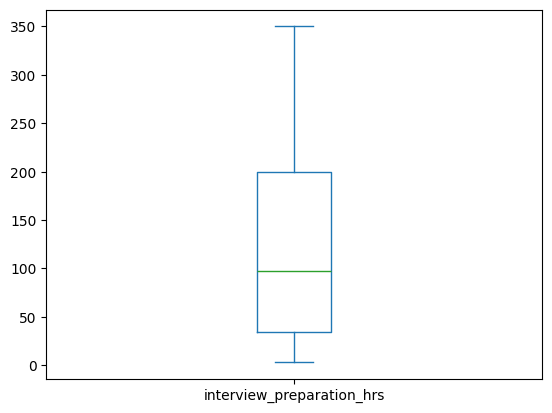

In [234]:
df_students_interview['interview_preparation_hrs'].plot(kind='box')

<Axes: xlabel='student_home_state'>

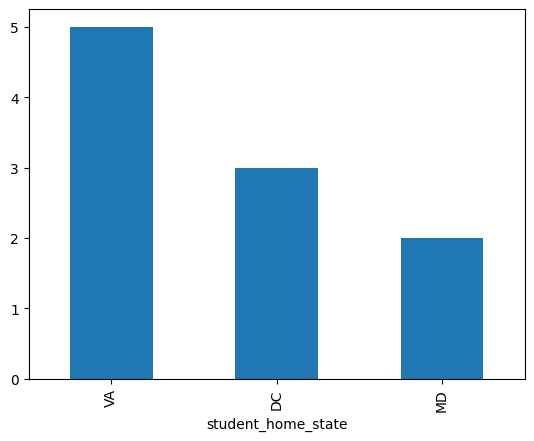

In [238]:
df_students_interview['student_home_state'].value_counts().plot(kind='bar')

In [244]:
merged= pd.merge(left=df_students,right=df_students_interview,how = 'inner', on = 'student_name', validate='1:1', indicator=True)

In [246]:
merged

,student_name,no_of_interviews,sex,age,student_home_city,student_home_state,interview_preparation_hrs,grad_school,_merge
0,Ezra,2,M,23,DC,DC,110,American University,both
1,Milo,1,M,56,Arlington,VA,3,Johns Hopkins University,both
2,Sally,4,F,21,DC,DC,85,Georgetown University,both
3,James,35,M,22,Alexandria,VA,140,Johns Hopkins University,both
4,Kylie,20,F,22,Charlottesville,VA,220,University of Virginia,both
5,Emma,28,F,23,DC,DC,74,Johns Hopkins University,both
6,Owen,18,M,21,Arlington,VA,280,George Mason University,both
7,Roy,14,M,24,Baltimore,MD,350,University of Maryland,both


In [250]:
merged['sex'].eq('M').mul(100).mean()

62.5

In [258]:
m_corr = merged[['no_of_interviews','interview_preparation_hrs']].fillna(0).corr()

<Axes: >

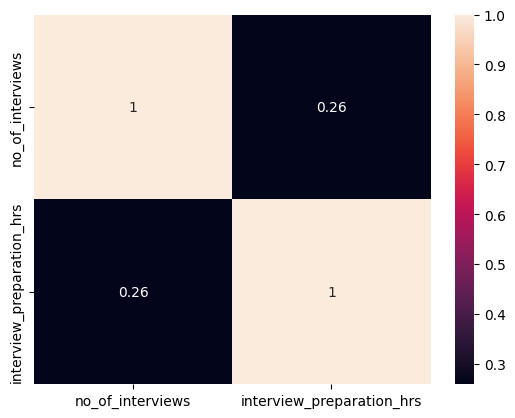

In [260]:
sns.heatmap(m_corr, annot=True)

In [266]:
merged[merged['interview_preparation_hrs']>=80].age.mean()

22.166666666666668